## Introduction

Training a neural network requires specifying initial values for the weights. A well-chosen initialization method is **critical** for effective learning. In this notebook, you will explore how different initialization strategies lead to dramatically different results.

### Why Initialization Matters

A well-chosen initialization can:

- **Speed up convergence** of gradient descent
- **Prevent vanishing or exploding gradients** that can stall learning

### Getting Started

Run the following cell to load the required packages and the planar dataset you will classify (blue vs. red dots).

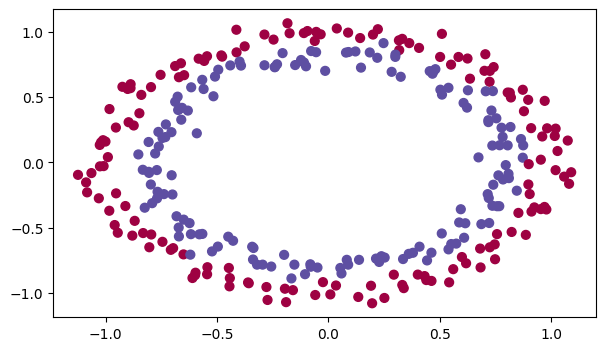

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from init_utils import sigmoid, relu, compute_loss, forward_propagation, backward_propagation
from init_utils import update_parameters, predict, load_dataset, plot_decision_boundary, predict_dec

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# load image dataset: blue/red dots in circles
train_X, train_Y, test_X, test_Y = load_dataset()

You would like a classifier to separate the blue dots from the red dots.

## 1 - Neural Network model 

You will use a **3-layer neural network** (already implemented in `init_utils.py`) with the following architecture:

**Architecture**: `LINEAR → RELU → LINEAR → RELU → LINEAR → SIGMOID`

### Initialization Methods to Experiment With

You will compare three different initialization strategies:

1. **Zeros initialization** (`initialization = "zeros"`)
   - Sets all weights to zero
   - ⚠️ Warning: This will fail to break symmetry!

2. **Random initialization (two variants)**
   - Small-scale random (`initialization = "random_small"` or `"random"`): initializes weights with a small scale (e.g., 0.01) to break symmetry, but can slow learning due to small gradients.
   - Large-scale random (`initialization = "random_large"`): initializes weights with a large scale (e.g., 10.0) to break symmetry, but can cause exploding activations/gradients and unstable training.

3. **He initialization** (`initialization = "he"`)
   - Scales random weights based on the paper by [He et al., 2015](https://arxiv.org/abs/1502.01852)
   - Optimized for networks with ReLU activations
   - Uses scaling factor: $\sqrt{\frac{2}{n^{[l-1]}}}$

### Instructions

Read through the `model()` function below to understand how it works. You will implement the three initialization methods that this function calls in the following sections.

In [13]:
def model(X, Y, learning_rate = 0.01, num_iterations = 15000, print_cost = True, initialization = "he"):
    """
    Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (containing 0 for red dots; 1 for blue dots), of shape (1, number of examples)
    learning_rate -- learning rate for gradient descent 
    num_iterations -- number of iterations to run gradient descent
    print_cost -- if True, print the cost every 1000 iterations
    initialization -- flag to choose which initialization to use ("zeros","random","random_small","random_large" or "he")
    
    Returns:
    parameters -- parameters learnt by the model
    """
        
    grads = {}
    costs = [] # to keep track of the loss
    m = X.shape[1] # number of examples
    layers_dims = [X.shape[0], 10, 5, 1]
    
    # Initialize parameters dictionary.
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random" or initialization == "random_small":
        parameters = initialize_parameters_random_small(layers_dims)
    elif initialization == "random_large":
        parameters = initialize_parameters_random_large(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        a3, cache = forward_propagation(X, parameters)
        
        # Loss
        cost = compute_loss(a3, Y)

        # Backward propagation.
        grads = backward_propagation(X, Y, cache)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 1000 iterations
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)
            
    # plot the loss
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

## 2 - Zero initialization

Neural networks have two types of trainable parameters:

- Weight matrices $\left(W^{[1]}, W^{[2]}, \,\ldots, W^{[L]}\right)$
- Bias vectors $\left(b^{[1]}, b^{[2]}, \,\ldots, b^{[L]}\right)$

### Task 1: Implement zero initialization
Implement `initialize_parameters_zeros(layers_dims)` to set all weights and biases to zero using `np.zeros(...)` with the correct shapes.

Contract:

- Input: `layers_dims` — list with layer sizes, where `layers_dims[0]` is the input size and `layers_dims[L]` is the output size
- Output: `parameters` — dict with keys `W1, b1, ..., WL, bL`
- Shapes: `W[l]` has shape `(layers_dims[l], layers_dims[l-1])`; `b[l]` has shape `(layers_dims[l], 1)` for `l = 1..L`

Note:

- This initialization is intentionally poor. Setting all weights to zero fails to break symmetry, so neurons within the same layer learn identical features. You'll observe that the model performs poorly.


In [14]:
def initialize_parameters_zeros(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    parameters = {}
    L = len(layers_dims)            # number of layers in the network
    
    for l in range(1, L):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W' + str(l)] = np.zeros((layers_dims[l], layers_dims[l-1]))
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
        ### END CODE HERE ###
    return parameters

In [15]:
parameters = initialize_parameters_zeros([3,2,1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[0. 0. 0.]
 [0. 0. 0.]]
b1 = [[0.]
 [0.]]
W2 = [[0. 0.]]
b2 = [[0.]]


**Expected Output**:

| Parameter | Value |
|------------|--------|
| W1 | `[[ 0.  0.  0.] [ 0.  0.  0.]]` |
| b1 | `[[ 0.] [ 0.]]` |
| W2 | `[[ 0.  0.]]` |
| b2 | `[[ 0.]]` |

Run the following code to train your model on 15,000 iterations using zeros initialization.

Cost after iteration 0: 0.6931471805599453
Cost after iteration 1000: 0.6931471805599453
Cost after iteration 2000: 0.6931471805599453
Cost after iteration 3000: 0.6931471805599453
Cost after iteration 4000: 0.6931471805599453
Cost after iteration 5000: 0.6931471805599453
Cost after iteration 6000: 0.6931471805599453
Cost after iteration 7000: 0.6931471805599453
Cost after iteration 8000: 0.6931471805599453
Cost after iteration 9000: 0.6931471805599453
Cost after iteration 10000: 0.6931471805599453
Cost after iteration 11000: 0.6931471805599453
Cost after iteration 12000: 0.6931471805599453
Cost after iteration 13000: 0.6931471805599453
Cost after iteration 14000: 0.6931471805599453


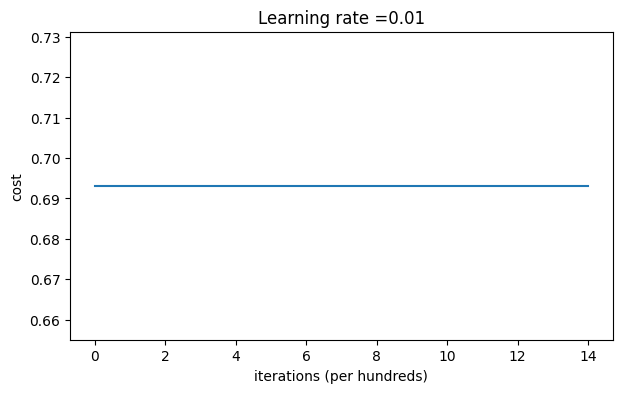

On the train set:
Accuracy: 0.5
On the test set:
Accuracy: 0.5


In [16]:
parameters = model(train_X, train_Y, initialization = "zeros")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

The performance is really bad, and the cost does not really decrease, and the algorithm performs no better than random guessing. Why? Lets look at the details of the predictions and the decision boundary:

In [17]:
print ("predictions_train = " + str(predictions_train))
print ("predictions_test = " + str(predictions_test))

predictions_train = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]
predictions_test = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


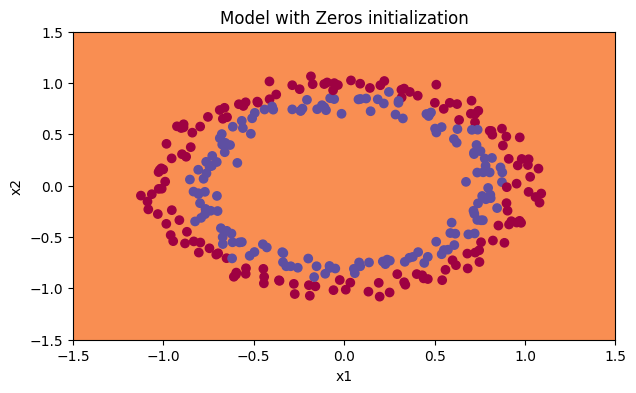

In [18]:
plt.title("Model with Zeros initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

The model is predicting 0 for every example!

## 3 - Random initialization (two cases)

To break symmetry, initialize the weights randomly so different neurons learn different features. Here, you'll compare two scales of random initialization and observe their effects on optimization.

### Case A: Large random numbers
- Use a large scale (e.g., multiply by 10)
- Pros: Breaks symmetry
- Cons: Can cause exploding activations/gradients and unstable training

### Case B: Small random numbers
- Use a small scale (e.g., multiply by 0.01)
- Pros: Stable activations at the start
- Cons: Can lead to very small gradients and slow learning (vanishing)

### Task 2A: Implement large-scale random initialization
Implement `initialize_parameters_random_large(layers_dims)` using `np.random.randn(...)*10` for weights and zeros for biases.

### Task 2B: Implement small-scale random initialization
Implement `initialize_parameters_random_small(layers_dims)` using `np.random.randn(...)*0.01` for weights and zeros for biases.

We use a fixed `np.random.seed(...)` for reproducibility.

In [22]:
def initialize_parameters_random_small(layers_dims):
    """
    Initialize weights to small random values and biases to zeros.
    Small scale encourages stable activations but can slow learning (vanishing gradients).
    """
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims)
    scale = 0.01
    for l in range(1, L):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * scale
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
        ### END CODE HERE ###
    return parameters


def initialize_parameters_random_large(layers_dims):
    """
    Initialize weights to large random values and biases to zeros.
    Large scale can cause exploding activations/gradients and unstable training.
    """
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims)
    scale = 10.0
    for l in range(1, L):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * scale
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
        ### END CODE HERE ###
    return parameters


# Backward compatible alias used by older cells; defaults to the small case
def initialize_parameters_random(layers_dims):
    return initialize_parameters_random_small(layers_dims)

In [23]:
parameters_small = initialize_parameters_random_small([3, 2, 1])
parameters_large = initialize_parameters_random_large([3, 2, 1])

print("SMALL SCALE (0.01)\nW1 = " + str(parameters_small["W1"]))
print("b1 = " + str(parameters_small["b1"]))
print("W2 = " + str(parameters_small["W2"]))
print("b2 = " + str(parameters_small["b2"]))

print("\nLARGE SCALE (10.0)\nW1 = " + str(parameters_large["W1"]))
print("b1 = " + str(parameters_large["b1"]))
print("W2 = " + str(parameters_large["W2"]))
print("b2 = " + str(parameters_large["b2"]))

SMALL SCALE (0.01)
W1 = [[ 0.01788628  0.0043651   0.00096497]
 [-0.01863493 -0.00277388 -0.00354759]]
b1 = [[0.]
 [0.]]
W2 = [[-0.00082741 -0.00627001]]
b2 = [[0.]]

LARGE SCALE (10.0)
W1 = [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
b1 = [[0.]
 [0.]]
W2 = [[-0.82741481 -6.27000677]]
b2 = [[0.]]


**Expected Output (qualitative)**:

- With the fixed random seed, the "large" case weights are on the order of 10, while the "small" case weights are on the order of 1e-2.
- Exact numbers may differ by formatting, but the scale difference should be clearly visible.

Run the following to train your model for each random-initialization scale (15,000 iterations each).

Large random initialization
Cost after iteration 0: inf
Cost after iteration 1000: 0.6234536713598091
Cost after iteration 2000: 0.5980143841549699


/Users/ltan/Documents/STAT 362-0/stat362-1/student/week 7/initialization/init_utils.py:145: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
/Users/ltan/Documents/STAT 362-0/stat362-1/student/week 7/initialization/init_utils.py:145: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 3000: 0.5637825110542296
Cost after iteration 4000: 0.5501424256754202
Cost after iteration 5000: 0.5444182785148962
Cost after iteration 6000: 0.5374174162231109
Cost after iteration 7000: 0.4736212691389837
Cost after iteration 8000: 0.39775663537945644
Cost after iteration 9000: 0.3934612144259106
Cost after iteration 10000: 0.39202322772602194
Cost after iteration 11000: 0.38920709067247655
Cost after iteration 12000: 0.38614097384146195
Cost after iteration 13000: 0.3849774878818227
Cost after iteration 14000: 0.38278296044202587


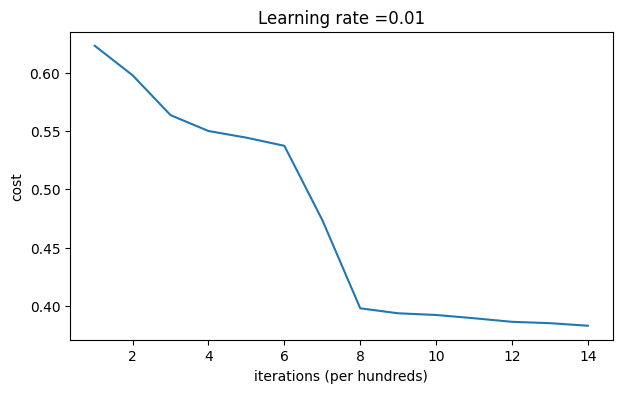

On the train set (LARGE):
Accuracy: 0.83
On the test set (LARGE):
Accuracy: 0.86

--------------------------------------------------------------------------------

Small random initialization
Cost after iteration 0: 0.6931473549048267
Cost after iteration 1000: 0.6931473504885134
Cost after iteration 2000: 0.6931473468317759
Cost after iteration 3000: 0.6931473432446151
Cost after iteration 4000: 0.6931473396813665
Cost after iteration 5000: 0.6931473361903396
Cost after iteration 6000: 0.6931473327310922
Cost after iteration 7000: 0.6931473293491259
Cost after iteration 8000: 0.6931473260187053
Cost after iteration 9000: 0.6931473227372426
Cost after iteration 10000: 0.6931473195009528
Cost after iteration 11000: 0.6931473163278133
Cost after iteration 12000: 0.693147312959552
Cost after iteration 13000: 0.6931473097541097
Cost after iteration 14000: 0.6931473065831708


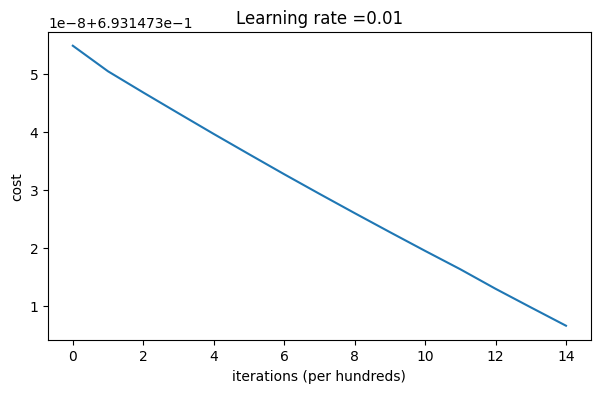

On the train set (SMALL):
Accuracy: 0.4633333333333333
On the test set (SMALL):
Accuracy: 0.48


In [24]:
# Large random initialization
print("Large random initialization")
parameters_large = model(train_X, train_Y, initialization = "random_large")
print ("On the train set (LARGE):")
predictions_train_large = predict(train_X, train_Y, parameters_large)
print ("On the test set (LARGE):")
predictions_test_large = predict(test_X, test_Y, parameters_large)

# add divider
print("\n" + 80*"-" + "\n")

# Small random initialization
print("Small random initialization")
parameters_small = model(train_X, train_Y, initialization = "random_small")
print ("On the train set (SMALL):")
predictions_train_small = predict(train_X, train_Y, parameters_small)
print ("On the test set (SMALL):")
predictions_test_small = predict(test_X, test_Y, parameters_small)



It looks like you have broken symmetry, and this gives better results than before. The model is no longer outputting all 0s. 
However, the model struggle to learn due to the vanishing/exploding gradient problem. 

In [25]:
print("LARGE scale predictions (train):", predictions_train_large)
print("LARGE scale predictions (test):", predictions_test_large)

# add divider
print("\n" + 80*"-" + "\n")

print("SMALL scale predictions (train):", predictions_train_small)
print("SMALL scale predictions (test):", predictions_test_small)

LARGE scale predictions (train): [[1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1
  1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0
  0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0
  1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
  0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1
  1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1
  0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1
  1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1
  1 1 1 1 0 0 0 1 1 1 1 0]]
LARGE scale predictions (test): [[1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1
  0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0
  1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0]]

--------------------------------------------------------------------------------

SMALL scale predictions 

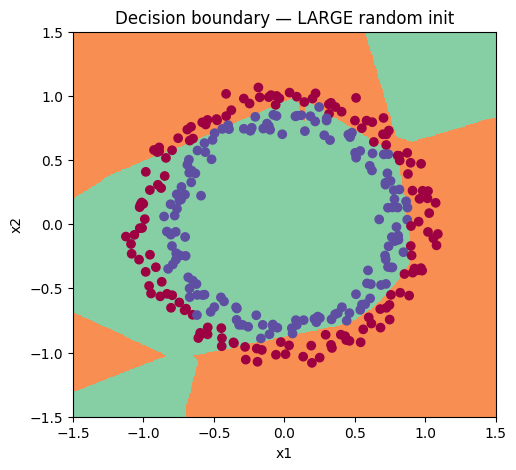

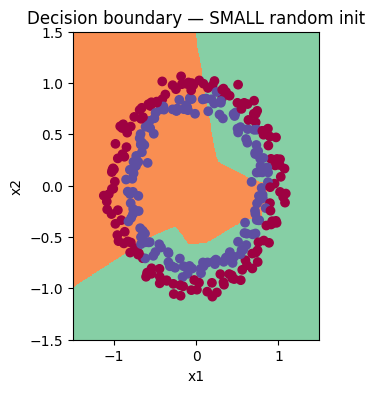

<Figure size 700x400 with 0 Axes>

In [26]:
# comparison of decision boundaries
plt.figure(figsize=(12, 5))

# LARGE random init
plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
plt.title("Decision boundary — LARGE random init")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(parameters_large, x.T), train_X, train_Y)

# SMALL random init
plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
plt.title("Decision boundary — SMALL random init")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(parameters_small, x.T), train_X, train_Y)

plt.tight_layout();


**Observations**:

- Large scale (×10): Tends to produce unstable activations/gradients and noisy decision boundaries. Training may fluctuate before settling (or may not settle well).
- Small scale (×0.01): Breaks symmetry but can make gradients very small at the start, slowing learning and delaying convergence.
- Both extremes can hurt optimization; appropriate, variance-aware schemes (e.g., He) usually work better.

## 4 - He initialization

Finally, try "He Initialization"; this is named for the first author of He et al., 2015. (If you have heard of "Xavier initialization", this is similar except Xavier initialization uses a scaling factor for the weights $W^{[l]}$ of `sqrt(1./layers_dims[l-1])` where He initialization would use `sqrt(2./layers_dims[l-1])`.)

### Task 3: Implement the following function to initialize your parameters with He initialization.

**Hint**: This function is similar to the previous `initialize_parameters_random(...)`. The only difference is that instead of multiplying `np.random.randn(..,..)` by 10, you will multiply it by $\sqrt{\frac{2}{\text{dimension of the previous layer}}}$, which is what He initialization recommends for layers with a ReLU activation. 

In [27]:
def initialize_parameters_he(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) - 1 # integer representing the number of layers
     
    for l in range(1, L + 1):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters["W" + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * np.sqrt(2 / layers_dims[l-1])
        parameters["b" + str(l)] = np.zeros((layers_dims[l], 1)) 
        ### END CODE HERE ###
        
    return parameters

In [28]:
parameters = initialize_parameters_he([2, 4, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
b2 = [[0.]]


**Expected Output**:

| Parameter | Value |
|------------|--------|
| W1 | `[[ 1.78862847  0.43650985] [ 0.09649747 -1.8634927 ] [-0.2773882  -0.35475898] [-0.08274148 -0.62700068]]` |
| b1 | `[[ 0.] [ 0.] [ 0.] [ 0.]]` |
| W2 | `[[-0.03098412 -0.33744411 -0.92904268  0.62552248]]` |
| b2 | `[[ 0.]]` |



Run the following code to train your model on 15,000 iterations using He initialization.

Cost after iteration 0: 0.8830537463419761
Cost after iteration 1000: 0.6879825919728063
Cost after iteration 2000: 0.6751286264523371
Cost after iteration 3000: 0.6526117768893807
Cost after iteration 4000: 0.6082958970572938
Cost after iteration 5000: 0.5304944491717495
Cost after iteration 6000: 0.41386458170717944
Cost after iteration 7000: 0.31178034648444414
Cost after iteration 8000: 0.23696215330322556
Cost after iteration 9000: 0.18597287209206834
Cost after iteration 10000: 0.1501555628037181
Cost after iteration 11000: 0.12325079292273548
Cost after iteration 12000: 0.09917746546525938
Cost after iteration 13000: 0.08457055954024274
Cost after iteration 14000: 0.07357895962677369


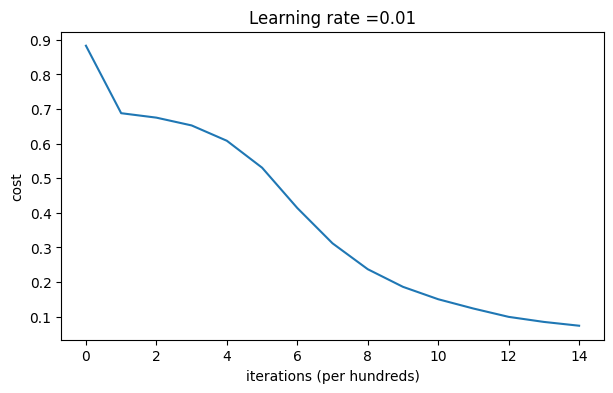

On the train set:
Accuracy: 0.9933333333333333
On the test set:
Accuracy: 0.96


In [29]:
parameters = model(train_X, train_Y, initialization = "he")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

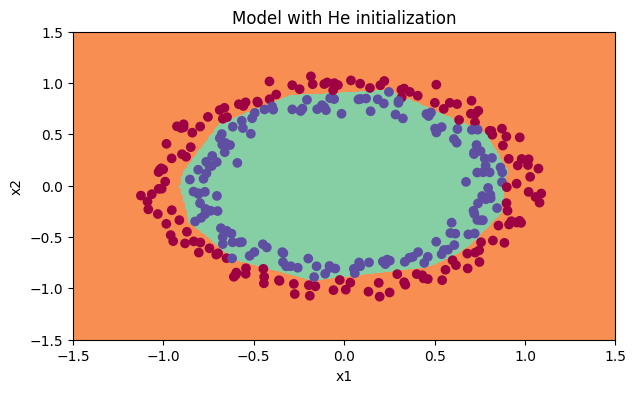

In [30]:
plt.title("Model with He initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

**Observations**:

- The model with He initialization separates the blue and the red dots very well in a small number of iterations.


## 5 - Conclusions

**What you should remember from this notebook**:

- Different initializations lead to different optimization dynamics and final results.
- Random initialization is required to break symmetry, but the scale matters:
  - Large scales (e.g., ×10) can cause exploding activations/gradients and instability.
  - Small scales (e.g., ×0.01) can cause vanishing gradients and slow learning.
- Biases can be initialized to zeros without harming symmetry breaking.
- He initialization (for ReLU) uses the scaling $\sqrt{2 / n^{[l-1]}}$ and typically yields fast, stable convergence and strong performance on this task.

## 6 - References

- [Glorot & Bengio (2010) — Understanding the difficulty of training deep feedforward neural networks](https://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf)
- [He, Zhang, Ren & Sun (2015) — Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification](https://arxiv.org/abs/1502.01852)
- [Initializing Neural Nets in DeepLearning.AI](https://www.deeplearning.ai/ai-notes/initialization/index.html)